In [4]:
# Import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import yfinance

import random
import sys
import os

In [7]:
class EDA:
    def __init__(self, data_folder):

        self.scraper = yfinance
        self.data_folder = data
        _folder
        self.ticker_files = data_folder + '/tickers'
        self.csv_files = data_folder + '/csv_files'

    # TODO: Save pulled data into path/data(csv)
    # Parse lines from various ticker files
    def parse_tickers(self):

        ticker_list = []
        # Add all filenames to a list
        for file in os.listdir(self.ticker_files):
            with open(self.ticker_files + '/' + file, mode = 'r') as file_:
                for line in file_:
                    ticker_list.append(line.rstrip())
        self.ticker_list = ticker_list

    
    def scrape_stock_data(self):
        """
        Use yfinance to make request of stock data
        """
        self.data = {}
        tickers = ['BTC-USD', 'ETH-USD', 'SOL-USD', 'XMR-USD', 'MMM', 'SPY', 'AAPL', 'PFE']

        for ticker in tickers:
            csv_file_dir = self.csv_files + '/' + ticker + '.csv'
            # Check if the file already exists in saved and remove from the list to optimize performance
            # if os.path.exists(csv_file_dir):
                # tickers.remove(ticker)
        

        for i in range(len(tickers)):
            self.data[tickers[i]] = self.scraper.download(tickers[i], start = '2020-01-26', end = '2021-01-27', progress = False)
            print(i)
            self.data[tickers[i]].name = tickers[i]
    
    def get_stock_data(self, tickers):
        """
        Returns stock data from the class dictionary in a dataframe form
        Params:
        tickers(list): name of the tickers for data
        """
        dfs = []
        for i in tickers:
            dfs.append(self.data[i])
            print(i)
        for i in dfs:
            i.to_csv(self.csv_files + '/' + i.name +'.csv', index = True)
        return dfs
    def temp(self):
        self.parse_tickers()
        self.scrape_stock_data()
        self.get_stock_data(self.ticker_list)

    def plot_helper(self, tickers, y, size_x, size_y, kind_, mode):
        """
        Plots the time series stock data
        Params:
        tickers
        y
        size_x
        size_y
        kind
        
        """
        ticker_names = []
        for i in range(len(tickers)):
            ticker_names.append(tickers[i].name)
        title_ = ''
        if mode == 'single':
            mode = True
        else:
            mode = False
        if len(tickers) >= 3: 
            for i in ticker_names:
                title_ += i + ' vs. '
            title_ += y
        else:
            title_ = y + 'Comparison'
        for i in tickers:
            i[y].plot(label = i.name, 
                        title = title_,
                        xlabel = 'Date', 
                        ylabel = str(y), 
                        figsize = (size_x, size_y), 
                        kind = kind_, 
                        use_index = True, 
                        legend = True)
        plt.show()

    def plot_stock_data(self):
        # Plot adjusted close over our data
        self.parse_tickers()
        self.scrape_stock_data()
        stocks = self.get_stock_data(['MMM', 'SPY', 'AAPL', 'PFE'])
        crypto = self.get_stock_data(['BTC-USD', 'ETH-USD', 'SOL-USD', 'XMR-USD'])

        # Plot our adjusted Close
        self.plot_helper(stocks, 'Adj Close', 12,8,'line', 'comb')
        # Plot our volume
        self.plot_helper(stocks, 'Volume', 12, 8, 'line', 'comb')
        # Plot our adjusted Close for crypto
        self.plot_helper(crypto, 'Adj Close', 12,8,'line', 'comb')
        self.plot_helper(crypto, 'Volume', 12, 8, 'line', 'comb')

        for i in stocks:
            self.plot_daily_return(i)
            plt.show()
        for i in crypto:
            self.plot_daily_return(i)
            plt.show()
        sns.heatmap(stocks[0].corr(), cmap = 'Blues', annot = True)
        self.create_difference_df(stocks[0])
    def create_difference_df(self, data):
        difference_df = pd.DataFrame()
        difference_df['open-high'] = data['Open']-data['High']
        difference_df['open-low'] = data['Open'] - data['Low']
        difference_df['close-high'] = data['Close']-data['High']
        difference_df['close-low'] = data['Close'] - data['Low']
        difference_df['high-low'] = data['High'] - data['Low']
        difference_df['open-close'] = data['Open'] - data['Close']
        difference_df['Volume'] = data['Volume']
        plt.figure(figsize = (12,7))
        sns.heatmap(difference_df.corr(), cmap = 'Reds', annot = True)
        plt.show()


    def plot_daily_return(self,data):
        data['Daily Return'] = data['Adj Close'].pct_change()
        mean = data['Daily Return'].mean()
        std = data['Daily Return'].std()
        data['Daily Return'].hist(bins = 20, label = data.name + ' Daily Return')
        plt.axvline(mean,color='red',linestyle='dashed',linewidth=2, label = 'mean')
        #to plot the std line we plot both the positive and negative values 
        plt.axvline(std,color='g',linestyle='dashed',linewidth=2, label = 'std')
        plt.axvline(-std,color='g',linestyle='dashed',linewidth=2,)
        plt.legend()

    def performance_analysis(self):
        pass

    def get_daily_return(self, data):
        data['Daily Return'] = data['Adj Close'].pct_change()



    # TODO: More financial stats
    def get_sharpe_ratio(self,data,days):
        daily_return = self.get_daily_return(data)
        return (days ** 0.5) * (np.mean(daily_return[1:])/np.std(daily_return[1:]))
        
    # TODO: Start by implementing RSI and VWAP 
    def RSI():
        pass
    def VWAP():
        pass
    def moving_averages(type):
        pass
    


0
1
2
3
4
5
6
7
MMM
SPY
AAPL
PFE
BTC-USD
ETH-USD
SOL-USD
XMR-USD


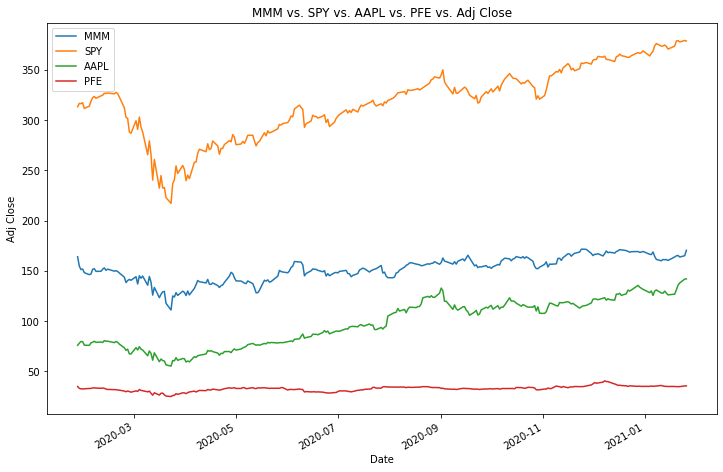

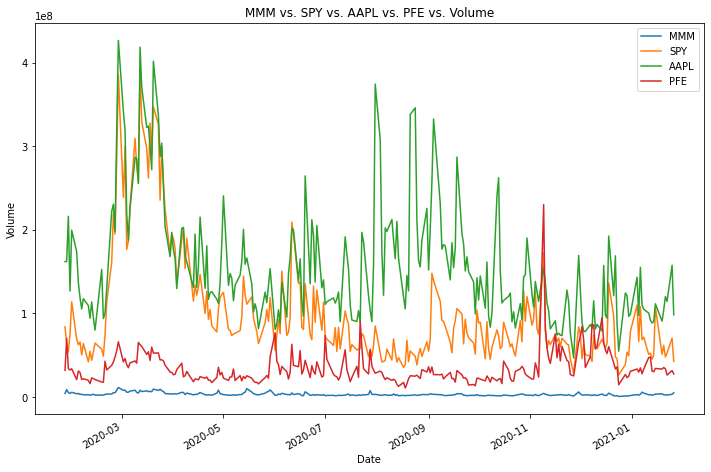

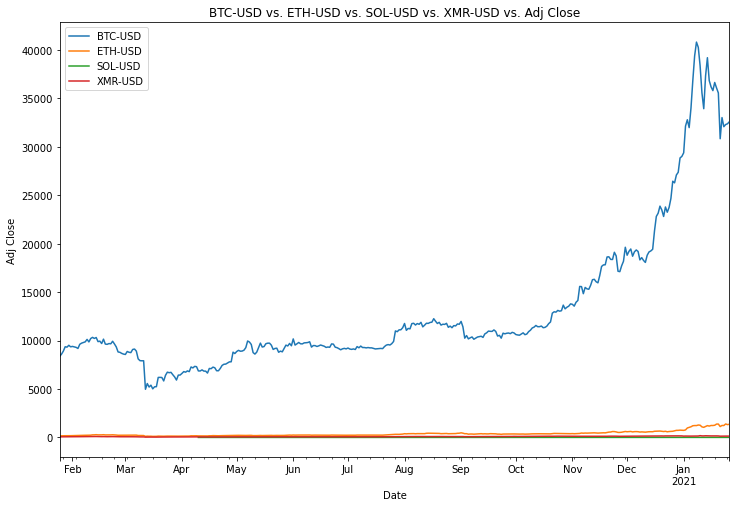

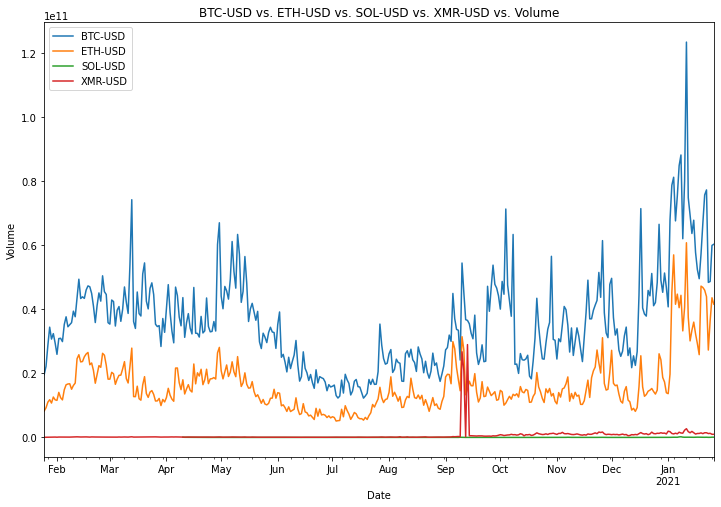

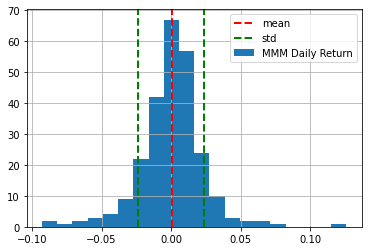

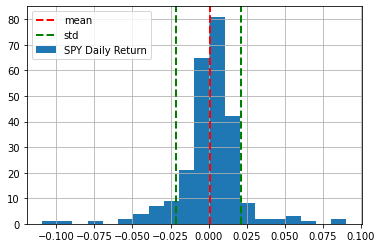

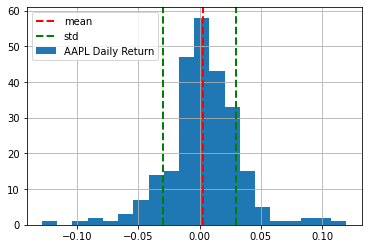

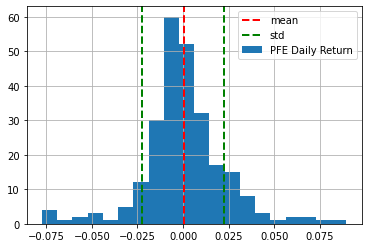

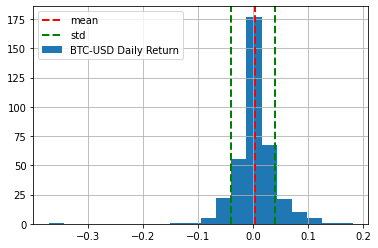

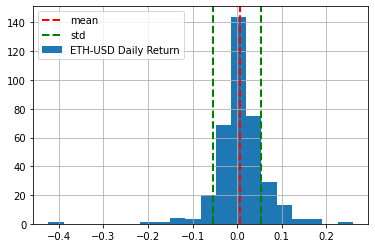

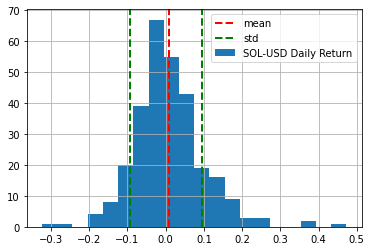

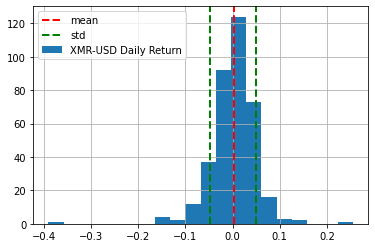

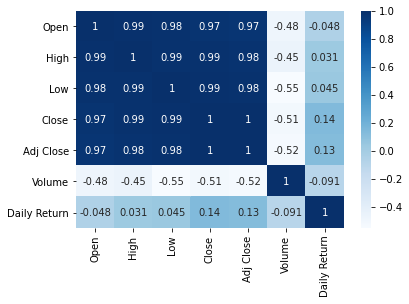

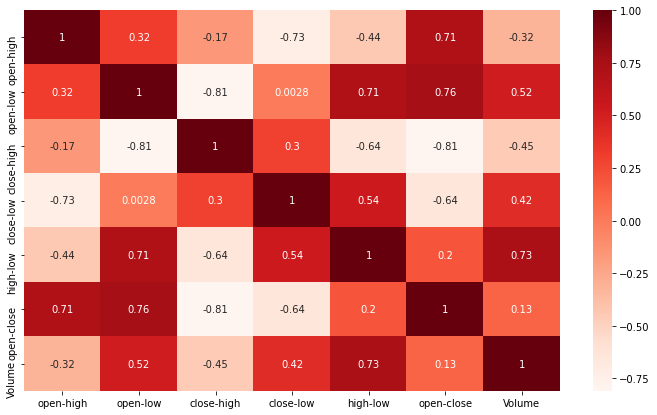

In [8]:
a = EDA('../data')
a.plot_stock_data()

## Explatory Data Analysis on Equity Data
Purpose of this Jupyter Notebook is to demonstrate various kinds of data analysis on different kinds of equity data which include;
1. International Stocks e.g SPY, AAPL
2. Cryptocurrency e.g; BTC-US, ETH-USD
3. Major International Stock Indices i.e; Nasdaq, TSX, QE
4. International currency; USD/JPY 
### Data Collection
The data was collected through the yahoo finance API. The code above allows for the download of custom dates but for the purposes of this analysis all the data is on a daily frequency on a 5 year resolution ending on 01/27/2022. 
### Getting Started
The best way to start is to define a time series data and explore what sorts of data analysis can be done on them. 

A time series data is defined as a series of observations over a regular or irregular period of time. One of the axises on a time series data is always a measurement of time, depending on how periodic the data happens to be. 
To visualize time series data we can,
1. Plot the time over the wanted attribute. For instance, weather data in Doha over the year 2021.
2. Plot the moving averages, a calculation used to analyze data points by creating a series of averages of different subsets of the full data set.
3. Plot Heatmap, shows how much each attribute is correlated to the others.
4. Plot distrubiton plots to view the univariate and bivariate distribution of the data.
5. Autocorrelation
6. Seasonality
7. Stationarity

### Applying it to equity data
There are a few more things we can visualize when it comes to equity data specifically;
1. Daily returns
2. Performance comparison with a certain benchmark 
3. A comparison of volume and price
4. Technical indicators
#### Heatmap Analysis
Analyzing the heatmap on MMM gives us the following insights:

1.  There are a lot of values that are either equal to 1 or are very close to it. This suggests a positive correlation, meaning whenever x increases, so does y.

Not finding this heatmap all that informative, I have created a second one that includes the diferences between the values as well.

This second map tells us the relationship between the differences in different price values and the volume. On example is the open-high negative correlation. This shows that bigger this difference is, the more the stock is traded during that day.




### Forecasting using various machine learning models